# Coursework 1 - Mathematics for Machine Learning

## CID: 02056823

**Colab link:** https://colab.research.google.com/drive/1NBBDiKAOqHDtdK_fGIdUZ5IlsXJ9oirB?usp=sharing

***
***

## Exercise 1: Quick questions [3 points]

#### Question 1:

Risk: The expected loss over the true data distribution, given by $$R(f) =  E[L(f(X),Y)]$$

Empirical risk: The average loss over the training dataset (a finite sample), given by $$\hat{R}(f) = \sum_{i-1}^n L(f(x_i),y_i)$$

#### Question 2:

Generalization error: The difference between the model's performance on seen data and the true data distribution.

Equivalently, it measures how close the empirical risk is to the true risk

Training error: The error computed on the training dataset.

#### Question 3:

Independence ensures that the probability bounds hold when summing random variables.

Specifically we need
$$
\mathbb{E} \left[e^{\sum_{i=1}^{n} W_i} \right]
=
\prod_{i=1}^{n} \mathbb{E}[e^{tW_i}],
$$  
which requires the assumption of independence.


#### Question 4:

Split the dataset into training and test sets. This can be 70:30 or 80:20 for example.

Train both hypothesis classes on the training set and compare their performance on the test set.

Mathematically, denote train and test sets as $D_1,D_2$,

For k = 1,2, we find
 $$ f_k = \arg \min_{f \in H_k} \sum_{i \in D_1} L(f(x_i), y_i)$$

Then test both $f_1, f_2$ on $D_2$ and compare their testing error:
$$\sum_{(x_i,y_i) \in D_2}L(f_k(x_i), y_i)$$ 


#### Question 5:

Rademacher complexity measures the hypothesis class's capacity using the data, leading to tighter generalization bounds.

Whereas in section 1.4, the bounds consider the worst-case and will be looser

#### Question 6:

Momentum accelerates convergence by adding a fraction of the previous update to the current gradient.

This helping to overcome oscillations, reaching optimum faster if the gradient is smooth, and escapes local minima.

*** 
***

## Exercise 2: Statistical learning theory [7 points]


### Question 1 [1 point]


The empirical risk minimizer $ f_{S_1, k} $ is given by

$$
 \arg\min_{f \in \mathcal{F}_k} 
 \frac{1}{(1-\alpha)N} \sum_{(x,y) \in S_1} L(f(x), y)
$$


***

### Question 2 [1 point]

By Boole's inequality,
$$
\mathbb{P}\left[ \sup_{k \geq 1} \left| R(f_{S_1, k}) - \hat{R}_{S_2}(f_{S_1, k}) \right| > \epsilon \right]
= \mathbb{P}\left[ \bigcup_{k=1}^\infty \left\{ \left| R(f_{S_1, k}) - \hat{R}_{S_2}(f_{S_1, k}) \right| > \epsilon \right\} \right] \\
\leq \sum_{k=1}^\infty \mathbb{P}\left[ \left| R(f_{S_1, k}) - \hat{R}_{S_2}(f_{S_1, k}) \right| \geq \epsilon \right].
$$

***

### Question 3 [1 point]

By law of total expectation,
$$
\mathbb{P}(A) = \mathbb{E}[1_A] = \mathbb{E}_B \left[\mathbb{P}(A \mid B)\right]
$$

Where A is the event $\left[\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon \right] $, and B is random sample $S_1$.

Hence
$$
\mathbb{P}\left[\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon \right] 
= 
\mathbb{E}\left[1_{\left\{\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon\right\}}\right] \\
=
\mathbb{E}_{S_1}\left[\mathbb{E}_{S_2}\left[1_{\left\{\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon\right\}} \mid S_1 \right]\right]\\

= 
\mathbb{E}_{S_1}\left[\mathbb{P}_{S_2}\left[\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon \mid S_1 \right]\right]
$$


***

### Question 4 [1 point]

Using Corollary 1.15, we note that given $S_1$, true risk $R(f_{S_1,k})$ is random with respect to $S_2$,

So the sample size is $|S_2| = \alpha N $
\begin{align*}
\mathbb{P}_{S_2 \sim D^{\alpha N}}\left[\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon \mid S_1 \right]
&\leq 2 \exp\left(-2 \alpha N \epsilon^2\right), 
\end{align*}

***

### Question 5 [1 point]

We plug in $ \epsilon + \sqrt{\frac{\log k}{\alpha N}}$ to $ \epsilon $ in the previous question:

$$
\mathbb{P}\left[\left| R(f_{S_1,k}) - \hat{R}_{S_2}(f_{S_1,k}) \right| \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \mid S_1 \right] 
\leq 2 \exp\left(-2 \alpha N \big({\epsilon + \sqrt{\frac{\log k}{\alpha N}}}\big)^2\right), \\

        = 2 \exp\left(-2 \alpha N (\epsilon^2 + 2 \epsilon \sqrt{\frac{\log k}{\alpha N}} + \frac{\log k}{\alpha N})\right) \\

    = 2\exp\left(-2 \alpha N \epsilon^2 \right) \exp\left(-2 \alpha N \frac{\log k}{\alpha N}\right) \exp\left(-4 \alpha N \epsilon \sqrt{\frac{\log k}{\alpha N}}\right) \\

    \leq 2\exp\left(-2 \alpha N \epsilon^2 \right) \exp\left(-2 \log k\right) = \frac{2}{k^2} \exp\left(-2 \alpha N \epsilon^2\right).
$$

Where we used that 
$$
\exp\left(-4 \alpha N  \epsilon \sqrt{\frac{\log k}{\alpha N}}\right) \leq 1
$$



***

### Question 6 [1 point]
WLOG, since $ \left| R(f_{S_1, k}) - \hat{R}_{S_2}(f_{S_1, k})\right|$ is a function of k, we can denote $\mathbb{R}_k =  \left| R(f_{S_1, k}) - \hat{R}_{S_2}(f_{S_1, k})\right|$

By similar logic to (2), we use Boole's inequality:

$$
\mathbb{P}\left\{ \sup_{k \geq 1} \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) > \epsilon \right\}
= \mathbb{P}\left[ \bigcup_{k=1}^\infty \left\{ \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) > \epsilon \right\} \right] \\
\leq \sum_{k=1}^\infty \mathbb{P}\left[  \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \geq \epsilon \right]. \\
= \sum_{k=1}^\infty \mathbb{P}\left[  \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \right].
$$

Using (3), we note that for each k,
$$
\mathbb{P}\left[  \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \right] = \mathbb{E}_{S_1}\left[ \mathbb{P}\left(  \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \mid S_1 \right) \right]
$$

So now we have
$$
\mathbb{P}\left\{ \sup_{k \geq 1} \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) > \epsilon \right\} 
\leq 
\sum_{k=1}^\infty \mathbb{E}_{S_1}\left[ \mathbb{P}\left(  \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \mid S_1 \right) \right]
$$

We showed in (5) that 
$$
\sum_{k=1}^\infty \mathbb{P}\left[ \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \right]
\leq \sum_{k=1}^\infty \frac{2}{k^2} \exp\left(-2 \alpha N \epsilon^2\right) \\
= 2 \frac{\pi^2}{6} \exp\left(-2 \alpha N \epsilon^2\right) \\
\leq 4 \exp\left(-2 \alpha N \epsilon^2\right)
$$

So we have
$$
\sum_{k=1}^\infty \mathbb{E}_{S_1}\left[ \mathbb{P}\left(  \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \mid S_1 \right) \right]\\
= \mathbb{E}_{S_1}\left[ \sum_{k=1}^\infty \mathbb{P}\left( \mathbb{R}_k \geq \epsilon + \sqrt{\frac{\log k}{\alpha N}} \right) \right]\\
\leq 
\mathbb{E}_{S_1}\left[ 4 \exp\left(-2 \alpha N \epsilon^2\right) \right]\\
= 4 \exp\left(-2 \alpha N \epsilon^2\right)
$$

And hence finally
$$
\mathbb{P}\left\{ \sup_{k \geq 1} \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) > \epsilon \right\} 
\leq 
4 \exp\left(-2 \alpha N \epsilon^2\right)
$$

***

### Question 7 [1 point]

From previous question (2.6), we have
$$
\mathbb{P}\left\{ \sup_{k \geq 1} \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) > \epsilon \right\} 
\leq 
4 e^{-2 \alpha N \epsilon^2}
$$

We choose $ \delta = 4 e^{-2 \alpha N \epsilon^2}$, such that
$ \epsilon = \sqrt{ \frac{ \log(\frac{4}{\delta} ) }{2 \alpha N} } $. 
Plugging in $\epsilon$, we get
$$
\mathbb{P}\left\{ \sup_{k \geq 1} \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) > \sqrt{ \frac{ \log(\frac{4}{\delta} ) }{2 \alpha N} } \right\} 
\leq 
\delta
$$
Or equivalently we can say that with at least $ 1- \delta $ probability:
$$
\sup_{k \geq 1} \left( \mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \right) \leq \sqrt{ \frac{ \log(\frac{4}{\delta} ) }{2 \alpha N} } 
$$
By properties of supremum, we know that for all $ k \geq 1$, with at least $ 1- \delta $ probability::
$$
\mathbb{R}_k - \sqrt{\frac{\log k}{\alpha N}} \leq \sqrt{ \frac{ \log(\frac{4}{\delta} ) }{2 \alpha N} } 
$$
or by definition of $ \mathbb{R}_k $:
$$
\left| R(f_{S_1, k}) - \hat{R}_{S_2}(f_{S_1, k})\right| \leq \sqrt{\frac{\log k}{\alpha N}} + \sqrt{ \frac{ \log(\frac{4}{\delta} ) }{2 \alpha N} } 
$$
Now we let 
$$
\widetilde{f}_{S_2}
\;=\;
\arg\min_{f \,\in\, \{f_{S_1,k},\,k\ge 1\}}\;\widehat{R}_{S_2}(f).
$$
i.e. out of all the $S_1$ minimizers $ f_{S_1,k} $, 
$\widetilde{f}_{S_2}$ is the one that minimizes the validation set error. 

And we let $\widetilde{k}$ be the index of the hypothesis class where $\widetilde{f}_{S_2}$ belongs.

In this case,
$$
f_{S_1, \widetilde{k}} = \widetilde{f}_{S_2} 
$$


Plug in $ k = \widetilde{k}$, we have that with at least $ 1- \delta $ probability:

$$
R\bigl(\widetilde{f}_{S_2}\bigr)
\;\;\le\;\;
\widehat{R}_{S_2}\bigl(\widetilde{f}_{S_2}\bigr)
\;+\;
\sqrt{\tfrac{\log \widetilde{k}}{\alpha N}}
\;+\;
\sqrt{\tfrac{\log(4/\delta)}{2\,\alpha N}},
$$


***
***

## Exercise 3: Optimization questions [4.5 points]

***

### Question 1 [0.5 point]

We need to show that for any $x, y \in \mathbb{R}^n$ and any $\lambda \in [0,1]$,
$$
\| \lambda x + (1-\lambda) y \|
\;\le\;
\lambda \|x\| \;+\; (1-\lambda)\|y\|.
$$
This follows directly from the triangle inequality. Hence, $x \mapsto \|x\|$ is convex.

***

### Question 2 [0.5 point]

Proof that g(x) = f(Ax + b) is convex, given f convex:

Let $x_1, x_2 \in \mathbb{R}^d$ and $\lambda \in [0,1]$. Then
$$
g(\lambda x_1 + (1-\lambda)x_2)
\;=\;
f\bigl(A(\lambda x_1 + (1-\lambda)x_2) + b\bigr)
\;=\;
f\bigl(\lambda(Ax_1 + b) + (1-\lambda)(Ax_2 + b)\bigr).
$$
By the convexity of $f$,
$$
g(\lambda x_1 + (1-\lambda)x_2)
\;\le\;
\lambda f(Ax_1 + b) \;+\; (1-\lambda) f(Ax_2 + b)
\;=\;
\lambda\,g(x_1) \;+\; (1-\lambda)\,g(x_2).
$$
Thus $g$ is convex.

***

### Question 3 [0.5 point]

Let $x_1, x_2 \in \mathbb{R}^n$ and $\lambda \in [0,1]$. Then
$$
h(\lambda x_1 + (1-\lambda)x_2)
=
f_1(\lambda x_1 + (1-\lambda)x_2)
+
f_2(\lambda x_1 + (1-\lambda)x_2).
$$
By the convexity of $f_1$ and $f_2$,
$$
f_1(\lambda x_1 + (1-\lambda)x_2)
\;\le\;
\lambda f_1(x_1) + (1-\lambda)f_1(x_2),
$$
and similarly for $f_2$. Adding these inequalities,
$$
h(\lambda x_1 + (1-\lambda)x_2)
\;\le\;
\lambda \bigl[f_1(x_1) + f_2(x_1)\bigr]
+ (1-\lambda)\bigl[f_1(x_2) + f_2(x_2)\bigr]
=
\lambda\,h(x_1) + (1-\lambda)\,h(x_2).
$$
Hence, $h$ is convex.

***

### Question 4 [1 point]

We know for a fixed scalar $t$, the function
$$
g(t) \;=\; \ln\bigl(1 + e^t\bigr)
$$
is convex in $t$ because its second derivative 
$$
g''(t) = \frac{e^t}{(1 + e^t)^2} > 0 \forall t
$$

Also each term $-y_i\,\langle x, a_i\rangle$ is an affine function of $x$. 

Composing a convex and nondecreasing function ($g$) with an affine transformation preserves convexity. Thus
$$
x \;\mapsto\; \ln\!\Bigl(1 + \exp\!\bigl(-y_i\,\langle x, a_i\rangle\bigr)\Bigr)
$$
is convex for each $i$.

Finally, $f(x)$ is just the average of these $n$ convex functions:
$$
f(x) \;=\; \frac{1}{n} \sum_{i=1}^n \ln\!\bigl(1 + \exp(-y_i\,\langle x, a_i\rangle)\bigr).
$$
An average (or sum) of convex functions is also convex. Therefore, $f$ is convex.


***

### Question 5 [1 point]

Prove $ \lambda_{\min}(A^\top A) $ strong convexity of
$$
f(x) \;=\; \tfrac{1}{2}\,\|\,A x - b\,\|_2^2
$$

First, recall the Hessian characterization of strong convexity. A twice-differentiable function
$f : \mathbb{R}^d \to \mathbb{R}$ is $\mu$-strongly convex if its Hessian satisfies
$\nabla^2 f(x) \succeq \mu I$ for all $x \in \mathbb{R}^d$, i.e., every eigenvalue of
$\nabla^2 f(x)$ is at least $\mu$.


We know that as a quadratic function,
$$
\nabla^2 f(x)
\;=\;
A^\top A
\quad
\text{for all }x.
$$
Since $A \in \mathbb{R}^{n \times d}$ has full column rank, $A^\top A$ is a positive-definite
$d\times d$ matrix. Therefore, its smallest eigenvalue is strictly positive:
$\lambda_{\min}\!\bigl(A^\top A\bigr) > 0$.
Hence,
$$
\nabla^2 f(x) \;\succeq\; \lambda_{\min}\bigl(A^\top A\bigr)\,I.
$$
By the Hessian condition for strong convexity, this implies that $f$ is
$\lambda_{\min}(A^\top A)$-strongly convex. 

In other words, for all $x,y \in \mathbb{R}^d$,
$$
f(y) 
\;\ge\; 
f(x) 
\;+\;
\langle\nabla f(x),\,y - x\rangle 
\;+\;
\frac{\lambda_{\min}(A^\top A)}{2}\,\|\,y - x\,\|_2^2.
$$


***

### Question 6 [1 point]

Given that f has $\mu$-strong convexity,
Taking $y = x_*$ (the global minimizer) gives
$$
f(x_*) 
\;\ge\;
f(x) 
\;+\;
\langle \nabla f(x),\, x_* - x\rangle 
\;+\;
\frac{\mu}{2}\,\|\,x_* - x\,\|_2^2.
$$
Rearranging,
$$
f(x) - f(x_*)
\;\le\;
\langle \nabla f(x),\, x - x_*\rangle
\;-\;
\frac{\mu}{2}\,\|\,x - x_*\|_2^2.
$$

To bound the right-hand side, note that by the Cauchy–Schwarz inequality,
$$
\bigl\langle \nabla f(x),\, x - x_*\bigr\rangle
\;\le\;
\|\nabla f(x)\|_2 \;\|\;x - x_*\|_2.
$$
Thus
$$
f(x) - f(x_* )
\;\le\;
\|\nabla f(x)\|_2\,\|\,x - x_*\|_2 
\;-\;
\tfrac{\mu}{2}\,\|\,x - x_*\|_2^2.
$$
Consider the scalar function
$$
g(t)
\;=\;
\alpha\,t \;-\; \tfrac{\mu}{2}\,t^2
\quad\text{where } \alpha = \|\nabla f(x)\|_2
\text{ and } t = \|\,x - x_*\|_2 \ge 0.
$$
A simple quadratic analysis shows that 
$$
\max_{t\ge0} g(t) = \frac{\alpha^2}{2\mu}
$$
Therefore,
$$
f(x) - f(x_*)
\;\le\;
\max_{t\ge0}\bigl[\alpha\,t - \tfrac{\mu}{2}\,t^2\bigr]
\;=\;
\frac{\|\nabla f(x)\|_2^2}{2\,\mu}.
$$


***
***

## Exercise 2: Gradient descent and linear regression [5.5 points]

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

X = torch.tensor(diabetes.data)
Y = torch.tensor(diabetes.target)

In [19]:
N, p = X.shape
print(N, p)

442 10


***
### Question 1 [0.5 point]

To add the intercept c, we simply augment a column of ones to X. Since $ \theta = ( \beta, c ) $, we are adding ones to the last column

In [20]:
# augment a column of ones to the data matrix
X = torch.cat((X, torch.ones(N, 1)), dim=1)
print(X.shape)

torch.Size([442, 11])


***
### Question 2 [0.5 point]

In [21]:
# Using torch.randperm, perform a random dataset split 
# with 80% = 353 of the data for training and 20% = 89 for testing
torch.manual_seed(0)
N_train = int(0.8 * N)
N_test = N - N_train
indices = torch.randperm(N)
train_indices = indices[:N_train]
test_indices = indices[N_train:]

X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


(torch.Size([353, 11]),
 torch.Size([353]),
 torch.Size([89, 11]),
 torch.Size([89]))

***
### Question 3 [0.5 point]

In [22]:
# Compute the least squares solution
theta_LS = torch.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
print(theta_LS)
# Predict on the test set
Y_pred = X_test @ theta_LS

# Compute the mean squared error on the test set
mse_LS = torch.mean((Y_test - Y_pred) ** 2)
print(f'Testing Mean Squared Error: {mse_LS.item()}')

tensor([ -56.7717, -220.2851,  530.0339,  307.6215, -887.5057,  576.6738,
         113.5875,  143.3339,  774.5839,   82.9405,  151.4319],
       dtype=torch.float64)
Testing Mean Squared Error: 2751.398827999471


***
### Question 4 [1 point]

Here since the loss is $ \frac{1}{N} \|X \theta - Y\|^2 $, 
the gradient is given by $ \frac{2}{N} X^T (X \theta - Y) $

Epoch 9999: Training Error: 2926.0053570200803


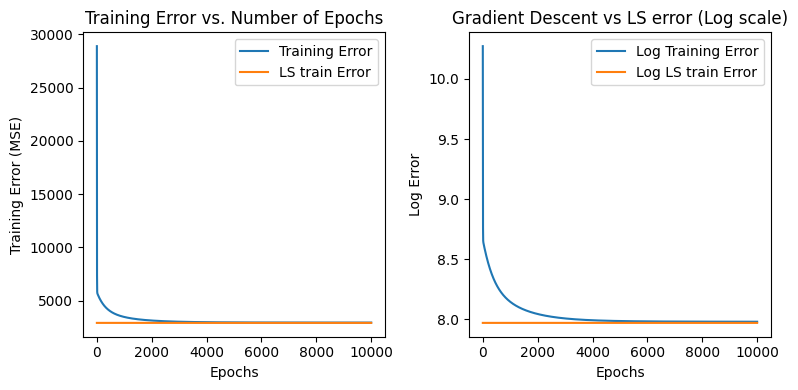

Testing Mean Squared Error (Gradient Descent): 2749.125305005122
Testing Mean Squared Error (Least Squares): 2751.398827999471


In [26]:
theta = torch.zeros(p + 1, dtype=torch.float64) # initialize the parameters to zeros
learning_rate = 0.1
epochs = 10**4
training_errors = [] # store the training error for each epoch

mse_LS_train = torch.mean((Y_train - X_train @ theta_LS) ** 2) # training error for LS

for epoch in range(epochs):
    Y_train_pred = X_train @ theta
    error = Y_train_pred - Y_train
    gradient = (X_train.T @ error) *2 / N_train
    theta -= learning_rate * gradient
    
    # Compute training error (mean squared error)
    # last epoch
    if epoch == epochs - 1:
        theta_last = theta
        Y_train_pred = X_train @ theta
        error = Y_train_pred - Y_train
        training_error = torch.mean(error ** 2)
        print(f'Epoch {epoch}: Training Error: {training_error.item()}')
    training_error = torch.mean(error ** 2)
    training_errors.append(training_error.item())

# plot both training error and log training error for better visualization
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 

# First plot: Training Error vs Epochs
axes[0].plot(range(epochs), training_errors, label='Training Error')
axes[0].plot(range(epochs), mse_LS_train.item() * np.ones(epochs), label='LS train Error')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training Error (MSE)')
axes[0].set_title('Training Error vs. Number of Epochs')
axes[0].legend() 

# Second plot: Log (Training Error - theta_LS) vs Epochs
axes[1].plot(range(epochs), np.log(np.array(training_errors)), label='Log Training Error')
axes[1].plot(range(epochs), np.log(mse_LS_train.item() * np.ones(epochs)), label='Log LS train Error')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Log Error')
axes[1].set_title('Gradient Descent vs LS error (Log scale)')
axes[1].legend() 
plt.tight_layout() 
plt.show()

# Predict on the test set using gradient descent parameters
Y_test_pred_gd = X_test @ theta

# Compute the mean squared error
mse_gd = torch.mean((Y_test - Y_test_pred_gd) ** 2)
print(f'Testing Mean Squared Error (Gradient Descent): {mse_gd.item()}')
print(f'Testing Mean Squared Error (Least Squares): {mse_LS.item()}')

After 10000 epochs, the Gradient Descent Testing MSE is 2749, slightly lower than that of LS. 

This is obviously random due to the intiial train-test split, but demonstrates gradient descent can reach similar levels of 
testing MSE with LS.

We additionally plot the log training error, and note that gradient descent converges to LS in terms of training error within the first 4000 epochs or so.

***
### Question 5 [0.5 point]

$$
x_{\mathrm{reg}} = \left(A^\top A + \lambda I\right)^{-1} A^\top b
$$


***
### Question 6 [0.5 point]

In [7]:
import pandas as pd
import torch

# no header row, all rows are data
A = pd.read_csv('A.csv', header=None)
B = pd.read_csv('b.csv', header=None)

# Convert the dataframes to torch tensors
A_tensor = torch.tensor(A.values, dtype=torch.float64)
B_tensor = torch.tensor(B.values, dtype=torch.float64)

# Perform a random dataset split with 80% for training and 20% for testing
N = A_tensor.shape[0]
N_train = int(0.8 * N)
N_test = N - N_train
# fix torch seed
torch.manual_seed(0)
indices = torch.randperm(N)
train_indices = indices[:N_train]
test_indices = indices[N_train:]

X_train = A_tensor[train_indices]
Y_train = B_tensor[train_indices]
X_test = A_tensor[test_indices]
Y_test = B_tensor[test_indices]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape



(torch.Size([800, 1000]),
 torch.Size([800, 1]),
 torch.Size([200, 1000]),
 torch.Size([200, 1]))

To compute the least squares estimator, we notice we can't proceed with simply inverting $ X^T X $ like before, 
as it is near singular, and inverting results in amplified numerical error.

We first try `torch.linalg.lstsq` here:

Notice I have fixed the seed for the random train-test split, 
so this operation should be non-random, 
but reruning the following cell would still result in a testing MSE around 0.4, 
different each time. This suggests numerical instability, and we need to change the method.

In [8]:
# We cannot directly invert the matrix X_train.T @ X_train because it is ill-conditioned, almost singular
theta_LS = torch.linalg.lstsq(X_train, Y_train).solution
# Predict on the test set
Y_pred = X_test @ theta_LS

# Compute the mean squared error on the test set
mse_LS = torch.mean((Y_test - Y_pred) ** 2)
print(f'Testing Mean Squared Error: {mse_LS.item()}')

Testing Mean Squared Error: 0.3419183022002248


We examine `torch.linalg.lstsq` with `driver = "gelsd"` here, which makes use of SVD and pesudoinverse internally. 
This would take around 30s on my CPU, which is quite slow.

I additionally used `driver = "gels"` which makes use of QR/LQ decomposition, which can make use of cuda, and is 300 times faster (takes 0.1s to run)

I have checked that both methods lead to an testing MSE of 2.23e-11, which is extremely low, near 0.

This is suggesting the LS estimator fits this dataset perfectly

In [9]:
# this also works, but slower:
# theta_LS, residuals, rank, svals =  torch.linalg.lstsq(X_train, Y_train, driver='gelsd')

In [10]:
theta_LS, residuals, rank, svals = torch.linalg.lstsq(X_train, Y_train, driver='gels')  # Works on GPU
Y_pred = X_test @ theta_LS
mse_LS = torch.mean((Y_test - Y_pred) ** 2)
print(f'Testing Mean Squared Error: {mse_LS.item()}')

Testing Mean Squared Error: 2.230087165583571e-11


We report that the testing error (MSE) of the least square estimator is 2.23e-11

***
### Question 7 [1 point]

Here, while the ridge loss is given by 
$$
\|Ax - b\|_2^2 + \lambda \|x\|_2^2,
$$
or
```python
torch.norm(X_train @ theta_ridge - Y_train, p=2)**2 + lambda_val * torch.norm(theta_ridge, p=2)**2
```
I found out this implementation would lead to a gradient too large, and the error exploding during gradient descent.

I have instead set my loss as 
```python
torch.mean((X_train @ theta_ridge - Y_train) ** 2) + lambda_val * torch.sum(theta_ridge ** 2)
```
Or the MSE, which is much smaller and leads to smaller gradients

using device: cuda


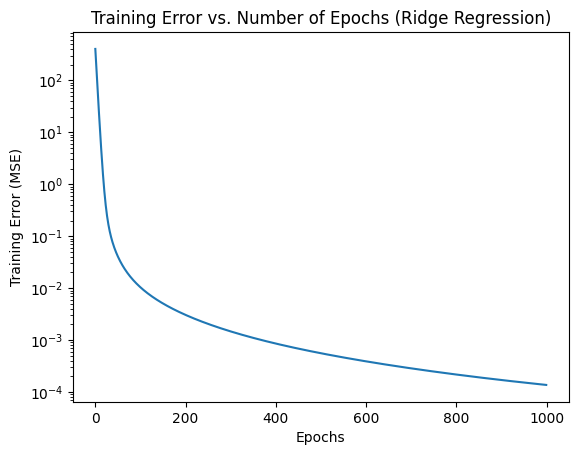

Testing Mean Squared Error (Ridge Regression): 8.038394669517089e-06


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check for CUDA availability
print('using device:', device)

# Move data to the appropriate device
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

N, p = X_train.shape
lambda_val = 0.0 

# Initialize the parameters to zeros
theta_ridge = torch.zeros(p, 1, dtype=torch.float64, requires_grad=True, device=device)
learning_rate = 0.1
epochs = 1000

# Store the training errors for each epoch
training_errors_ridge = []

# Perform gradient descent
for epoch in range(epochs):

    Y_train_pred_ridge = X_train @ theta_ridge

    # Compute the loss (mean squared error with ridge regularization)
    loss = torch.norm(X_train @ theta_ridge - Y_train, p=2)**2 + lambda_val * torch.norm(theta_ridge, p=2)**2
    loss.backward()  # Backpropagate the loss

    # Update the parameters
    with torch.no_grad():
        theta_ridge -= learning_rate * theta_ridge.grad
        theta_ridge.grad.zero_()

    # Store the training error (mean squared error)
    training_errors_ridge.append(loss.item())

# Plot the training error for ridge regression
plt.plot(range(epochs), training_errors_ridge)
plt.xlabel('Epochs')
plt.ylabel('Training Error (MSE)')
plt.title('Training Error vs. Number of Epochs (Ridge Regression)')
plt.yscale('log')  # Use log scale for better visualization
plt.show()

# Predict on the test set using ridge regression parameters
Y_test_pred_ridge = X_test @ theta_ridge

# Compute the mean squared error on the test set
mse_ridge = torch.mean((Y_test - Y_test_pred_ridge) ** 2)
print(f'Testing Mean Squared Error (Ridge Regression): {mse_ridge.item()}')

We report that the MSE for the least squares error using gradient descent is 8e-6, which is larger than the analytical least sqaures we get from Q6, but still sufficiently small.

Potentially if we try a range of different starting values for gradient descent, we could get an error as small as the Q6 one

***
### Question 8 [1 point]

cuda
saving ridge of Lambda: 0.2222996482526191


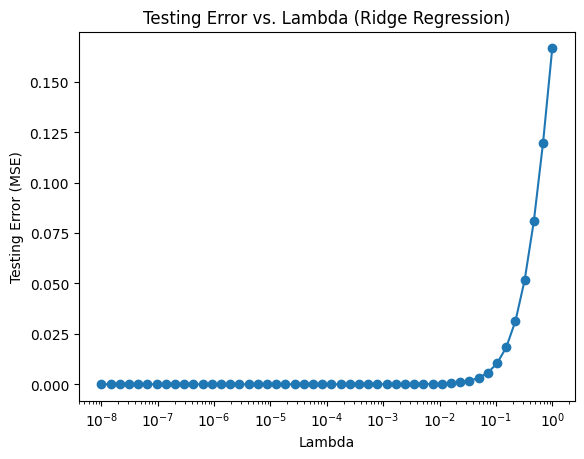

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define the range of lambda values in log scale
lambda_values = np.logspace(-8, 0, num=50)

testing_errors_ridge = [] # store the testing errors for each lambda

# Move data to the appropriate device
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

count = 0
for lambda_val in lambda_values:
    # Initialize the parameters to zeros
    theta_ridge = torch.zeros(p,1, dtype=torch.float64, requires_grad=True, device=device)
    learning_rate = 0.1
    epochs = 1000

    # Perform gradient descent
    for epoch in range(epochs):
        # Zero the gradients
        if theta_ridge.grad is not None:
            theta_ridge.grad.zero_()
        
        Y_train_pred_ridge = X_train @ theta_ridge
        
        # Compute the loss (mean squared error with ridge regularization)
        loss = torch.norm(X_train @ theta_ridge - Y_train, p=2)**2 + lambda_val * torch.norm(theta_ridge, p=2)**2
        loss.backward()  # Backpropagate the loss
        
        # Update the parameters
        with torch.no_grad():
            theta_ridge -= learning_rate * theta_ridge.grad

    # save lambd = 0.222 for further analysis
    if count == 45:
        print(f'saving ridge of Lambda: {lambda_val}')
        ridge_45 = theta_ridge


    Y_test_pred_ridge = X_test @ theta_ridge

    # Compute the mean squared error on the test set
    mse_ridge = torch.mean((Y_test - Y_test_pred_ridge) ** 2)
    testing_errors_ridge.append(mse_ridge.item())
    count += 1

# Move testing errors back to CPU for plotting
lambda_values = np.array(lambda_values)
testing_errors_ridge = np.array(testing_errors_ridge)

# Plot the testing error as a function of lambda
plt.plot(lambda_values, testing_errors_ridge, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Testing Error (MSE)')
plt.title('Testing Error vs. Lambda (Ridge Regression)')
plt.show()


Based on this plot, we notice it is pretty much monotonically incresing on lambda, with lambda = 0 producing basically zero loss.

While the plot suggests we should choose lambda=0 to minimize the training loss, a better choice may be to choose a lambda of between $ 10^{-4}$ and $ 10^{-2}$, which keeps training loss below 0.001, but has a smaller variance and may improve on unseen data.

This makes sense because the 1000 features that we have involve a lot of multicollinearity, making $ X^T X $ ill-conditioned and almost singular. 

Adding some ridge penalty will introduce some bias but reduces variance, improving generalization.

But we definitely don' want a lambda bigger than $ 10^{-1}$, because this will be making our coefficient biased, as can be seen below,
where I plot the ridge parameters with $ \lambda = 0, 0.222, 1$ respectively

Text(0.5, 1.0, 'Least Squares ridge coefficients')

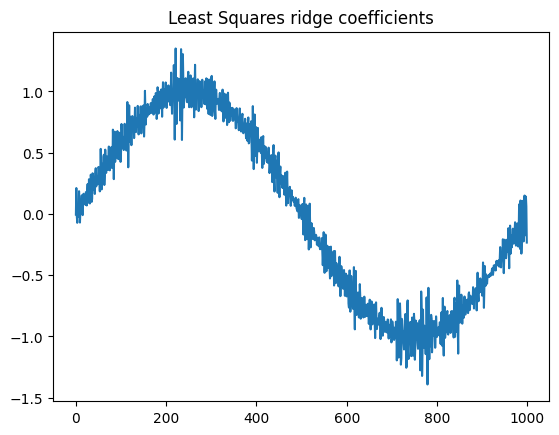

In [13]:
plt.plot(theta_LS.cpu(), label='Least Squares')
plt.title('Least Squares ridge coefficients')

Text(0.5, 1.0, 'Ridge coefficients lambd = 0.222')

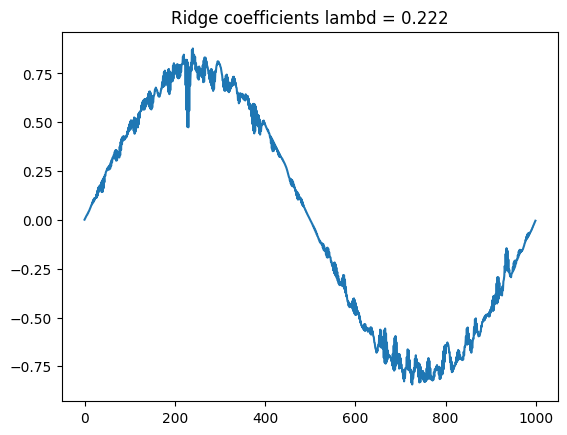

In [14]:
plt.plot(ridge_45.cpu().detach(), label='Ridge Lambda 0.222')
plt.title('Ridge coefficients lambd = 0.222')

Text(0.5, 1.0, 'Ridge coefficients lambd = 1')

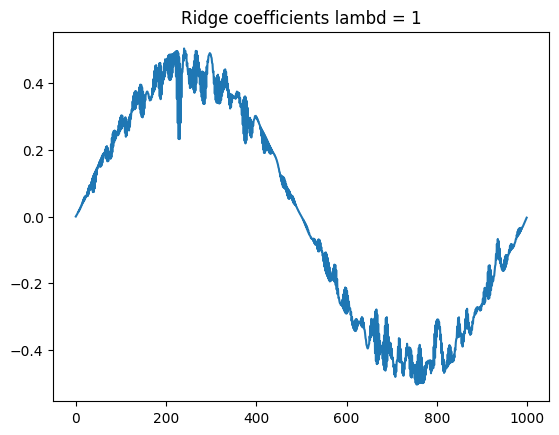

In [15]:
plt.plot(theta_ridge.cpu().detach(), label='Ridge Regression')
plt.title('Ridge coefficients lambd = 1')

We notice that in all three cases, the coefficients follow a sine-like pattern. 

The LS parameters which yield basically zero error, is seen to behave like $ sin(\frac{1000}{2\pi} x) $

With ridge penalty, the larger the penalty is, the more the coefficients at index 250 and 750 are shrunk to 0, causing bias

Text(0.5, 1.0, 'sin(2pi/1000 x)')

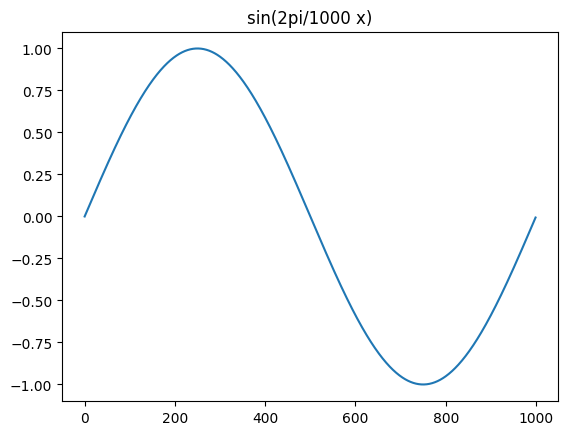

In [28]:
# plot sin(2pi/1000 x)
x = torch.arange(1000).float()
y = torch.sin(2 * np.pi / 1000 * x)
plt.plot(y, label='sin(2pi/1000 x)')
plt.title('sin(2pi/1000 x)')